##  PART-1

### **Logistic Regression** 

In [1]:
# Importing the libraries required

import pandas as pd
import numpy as np

In [2]:
# Reading the dataset

penguin_df = pd.read_csv("datasets/datasets/penguins.csv")

In [3]:
# Finding the top 5 rows, shape of the dataset

penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
penguin_df.shape

(344, 8)

In [5]:
# Looking at the description of the dataset.

penguin_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


We can understand that there are few rows which are equal to NA, 2 columns which are not numerical and also we can consider 'species' column as our target variable. There are now 7 features and 1 target variable.

In [6]:
# Start performing pre-processing for the dataset

## Identify any duplicate values

duplicate_rows_df = penguin_df[penguin_df.duplicated()]

In [7]:
duplicate_rows_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [8]:
## Identify missing values

bill_length_mm_nan = penguin_df['bill_length_mm'].isnull().sum()
bill_depth_mm_nan = penguin_df['bill_depth_mm'].isnull().sum()
flipper_length_mm_nan = penguin_df['flipper_length_mm'].isnull().sum()
body_mass_g_nan = penguin_df['body_mass_g'].isnull().sum()
species_nan = penguin_df['species'].isnull().sum()
island_nan = penguin_df['island'].isnull().sum()
sex_nan = penguin_df['sex'].isnull().sum()
year_nan = penguin_df['year'].isnull().sum()

In [9]:
print("Number of NaN values for 'bill_length_mm' is", bill_length_mm_nan)
print("Number of NaN values for 'bill_depth_mm' is", bill_depth_mm_nan)
print("Number of NaN values for 'flipper_length_mm' is", flipper_length_mm_nan)
print("Number of NaN values for 'body_mass_g' is", body_mass_g_nan)
print("Number of NaN values for 'species' is", species_nan)
print("Number of NaN values for 'island' is", island_nan)
print("Number of NaN values for 'sex' is", sex_nan)
print("Number of NaN values for 'year' is", year_nan)

Number of NaN values for 'bill_length_mm' is 2
Number of NaN values for 'bill_depth_mm' is 2
Number of NaN values for 'flipper_length_mm' is 2
Number of NaN values for 'body_mass_g' is 2
Number of NaN values for 'species' is 0
Number of NaN values for 'island' is 0
Number of NaN values for 'sex' is 11
Number of NaN values for 'year' is 0


From the above calculations, we understand there are few missing values except for the columns 'species', 'island' and 'year.

In [10]:
# I don't want to replace or fill nan values with mode, median or mean as it might affect the accuracy for our dataset,
# So I am removing all the nan values

new_penguin_df = penguin_df.dropna(axis = "index")

In [11]:
new_penguin_df.shape

(333, 8)

Now we see that there are some rows removed from our previous data frame, our data is not having any missing values.

In [12]:
# After removing missing values, our next task is to encode the categorical variables such as 'island', 'sex', 'species'

# To encode first let us find out how many unique values are there in these columns and also number of each unique value

np.unique(new_penguin_df[['island']])
new_penguin_df[['island']].value_counts()

island   
Biscoe       163
Dream        123
Torgersen     47
dtype: int64

In [13]:
new_penguin_df[['sex']].value_counts()

sex   
male      168
female    165
dtype: int64

In [14]:
new_penguin_df[['species']].value_counts()

species  
Adelie       146
Gentoo       119
Chinstrap     68
dtype: int64

In [15]:
# Encoding these variables

encoded_data = pd.get_dummies(new_penguin_df, columns = ['island', 'sex', 'species'])

In [16]:
encoded_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,2007,0,0,1,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,2007,0,0,1,1,0,1,0,0
2,40.3,18.0,195.0,3250.0,2007,0,0,1,1,0,1,0,0
4,36.7,19.3,193.0,3450.0,2007,0,0,1,1,0,1,0,0
5,39.3,20.6,190.0,3650.0,2007,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,1,0
340,43.5,18.1,202.0,3400.0,2009,0,1,0,1,0,0,1,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,1,0
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,1,0


In [17]:
# Normalize non-categorical features (culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g). 

## Performing Min-max normalization

# Considering non-categorical features
non_categorical_df = encoded_data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
min_val = non_categorical_df.min()
max_val = non_categorical_df.max()

normalized_df = (non_categorical_df - min_val)/(max_val - min_val)

In [18]:
normalized_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
4,0.167273,0.738095,0.355932,0.208333
5,0.261818,0.892857,0.305085,0.263889


As we look at the normalized dataframe with non-categorical features, we observe all the values are between 0 and 1 using min-max normalization.

In [19]:
# We will drop all the non-normalized columns and add the normalized features to our dataframe

new_penguin_df = encoded_data.drop(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis = 1)

In [20]:
# Adding the normalized features to dataframe

new_penguin_df = pd.concat([new_penguin_df, normalized_df], axis = 1)

In [21]:
new_penguin_df.shape

(333, 13)

In [22]:
new_penguin_df.head()

,year,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,species_Adelie,species_Chinstrap,species_Gentoo,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,2007,0,0,1,0,1,1,0,0,0.254545,0.666667,0.152542,0.291667
1,2007,0,0,1,1,0,1,0,0,0.269091,0.511905,0.237288,0.305556
2,2007,0,0,1,1,0,1,0,0,0.298182,0.583333,0.389831,0.152778
4,2007,0,0,1,1,0,1,0,0,0.167273,0.738095,0.355932,0.208333
5,2007,0,0,1,0,1,1,0,0,0.261818,0.892857,0.305085,0.263889


In [23]:
# We are choosing 'sex' variable as our target variable for Binary classification as the value counts are almost equal for both 'female' and 'male'
# But to choose Y variable, we have to merge 'sex_male', 'sex_female'
# Choosing 0 as 'male', 1 as 'female'

variable_list = []
for male, female in zip(new_penguin_df['sex_male'], new_penguin_df['sex_female']):
    if male == 1:
        variable_list.append(0)
    else:
        variable_list.append(1)
new_penguin_df['sex'] = variable_list


In [24]:
new_penguin_df.head()

,year,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,species_Adelie,species_Chinstrap,species_Gentoo,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2007,0,0,1,0,1,1,0,0,0.254545,0.666667,0.152542,0.291667,0
1,2007,0,0,1,1,0,1,0,0,0.269091,0.511905,0.237288,0.305556,1
2,2007,0,0,1,1,0,1,0,0,0.298182,0.583333,0.389831,0.152778,1
4,2007,0,0,1,1,0,1,0,0,0.167273,0.738095,0.355932,0.208333,1
5,2007,0,0,1,0,1,1,0,0,0.261818,0.892857,0.305085,0.263889,0


In [25]:
# Removing 'sex_female', 'sex_male' columns

new_penguin_df = new_penguin_df.drop(['sex_female', 'sex_male'], axis = 1)

In [26]:
new_penguin_df.head()

,year,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2007,0,0,1,1,0,0,0.254545,0.666667,0.152542,0.291667,0
1,2007,0,0,1,1,0,0,0.269091,0.511905,0.237288,0.305556,1
2,2007,0,0,1,1,0,0,0.298182,0.583333,0.389831,0.152778,1
4,2007,0,0,1,1,0,0,0.167273,0.738095,0.355932,0.208333,1
5,2007,0,0,1,1,0,0,0.261818,0.892857,0.305085,0.263889,0


In [27]:
# Defining X and y variables

# Dropping year column as well as it is not giving accuracy as expected and adds no value to the model
Y = new_penguin_df.iloc[:, -1]
X = new_penguin_df.drop(['year', 'sex'], axis = 1)

In [28]:
print("X(input) is in the shape of N*d that is " + str(X.shape) + " and Y is in the shape of N*1 that is " + str(Y.shape))

X(input) is in the shape of N*d that is (333, 10) and Y is in the shape of N*1 that is (333,)


In [29]:
# Splitting the dataset into training and testing as 80% training and 20% testing

# Setting the split ratio value to 0.8
split_ratio = 0.8
 
x_train = X[: int(split_ratio*len(X))]
x_test =  X[int(split_ratio*len(X)):]
y_train = Y[:int(split_ratio*len(X))]
y_test = Y[int(split_ratio*len(X)):]

In [30]:
# Printing the shape of x_train, y_train, x_test, y_test

print("The shape of x_train, y_train, y_train, y_test is ", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

The shape of x_train, y_train, y_train, y_test is  (266, 10) (266,) (67, 10) (67,)


In [51]:
# Writing the Logistic Regression model

class LogitRegression:
    
    # Initializing learning rate and number of iterations
    def __init__(self, learning_rate, iterations):
        
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    # Defining the sigmoid function
    def sigmoid(self, val):
        return 1/(1+np.exp(-val))
    
    # Defining the cost function as given in the problem
    
    def cost(self, x, y, weights, bias):
        
        val = np.dot(x, self.weights) + self.bias
        pred_val = self.sigmoid(val)
        size = x.shape[0]
        obj_func = (-np.dot(y,np.log(pred_val)) - np.dot((1-y), np.log(1-pred_val)))/(size)
        return obj_func
    
    def gradient_descent(self, x, y, weights, bias):
        val = np.dot(x, self.weights) + self.bias
        pred_val = self.sigmoid(val)
        
        # Finding the error and returning the derivative
        delta = pred_val-y
        size = x.shape[0]
        dw = np.dot(x.T, delta)/size
        return dw

    def fit(self, x, y):
        self.weights = np.random.uniform(0,1, x.shape[1])
        
        # Setting the bias value to 0.3
        self.bias = 0.3
        self.loss_val = []
        for i in range(self.iterations):
            dw = self.gradient_descent(x, y, self.weights, self.bias)
            self.loss_val.append(self.cost(x, y, self.weights, self.bias))
            self.weights = self.weights - (learning_rate*dw)
            
        return self.weights, self.loss_val

In [52]:
# Defining the predict() function

def predict(x, weights):
    predict_values = []
    
    # Applying the activation function to the y_pred value
    
    y_pred = 1/(1+(np.exp(-(np.dot(weights, x.T) + 0.3))))
    
    return [1 if val >= 0.5 else 0 for val in y_pred]

In [56]:
learning_rate = 0.07
iterations = 80000
#weights = np.random.uniform(0,1, X.shape[1])

lr = LogitRegression(learning_rate, iterations)
final_weights, loss_value = lr.fit(x_train, y_train)

In [57]:
# Printing out the loss values for first 20 iterations

print(loss_value[0:20])

[1.4748524253028104, 1.4474643877758995, 1.4205623408378896, 1.3941621389565226, 1.368279159806507, 1.3429281919181681, 1.3181233206000977, 1.2938778137480988, 1.2702040093006206, 1.247113206211254, 1.2246155608733633, 1.2027199909433546, 1.1814340884621264, 1.1607640440659766, 1.1407145839085182, 1.1212889206868923, 1.1024887198848816, 1.0843140820213362, 1.0667635413363377, 1.0498340809731594]


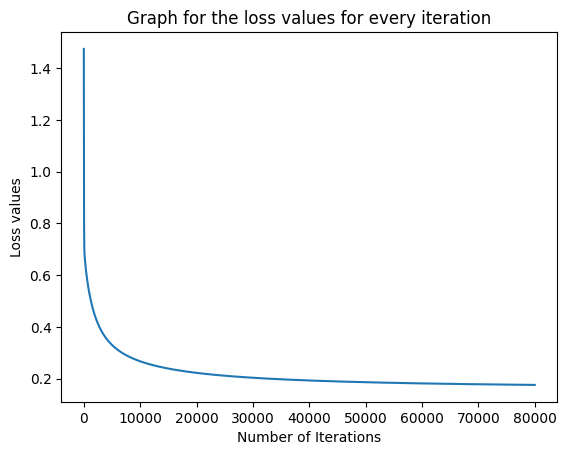

In [65]:
import matplotlib.pyplot as plt

plt.plot(range(iterations), loss_value)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss values")

plt.title("Graph for the loss values for every iteration")
plt.show()

In [75]:
num_iterations = [1000, 3000, 5000, 7000]
learning_rates = [0.05, 0.02, 0.07, 0.01]

lr = LogitRegression(learning_rates[0], num_iterations[0])
final_weights, loss_value1 = lr.fit(x_train, y_train)

lr = LogitRegression(learning_rates[1], num_iterations[1])
final_weights, loss_value2 = lr.fit(x_train, y_train)

lr = LogitRegression(learning_rates[2], num_iterations[2])
final_weights, loss_value3 = lr.fit(x_train, y_train)

lr = LogitRegression(learning_rates[3], num_iterations[3])
final_weights, loss_value4 = lr.fit(x_train, y_train)

C:\Users\Saharsha'\AppData\Local\Temp\ipykernel_18248\1622714046.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


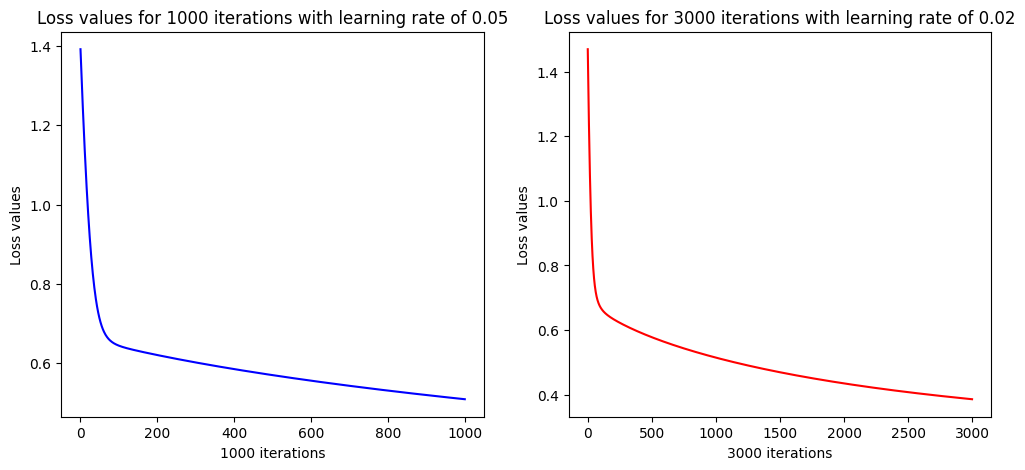

In [78]:
#Creating subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(range(num_iterations[0]), loss_value1, color='blue')

#Setting the title of the graph
ax[0].set_title('Loss values for 1000 iterations with learning rate of 0.05')

#Setting x label and y label
ax[0].set_xlabel('1000 iterations')
ax[0].set_ylabel('Loss values')

ax[1].plot(range(num_iterations[1]), loss_value2, color='red')
                
#Setting the title of the graph
ax[1].set_title('Loss values for 3000 iterations with learning rate of 0.02')

#Setting x label and y label
ax[1].set_xlabel('3000 iterations')
ax[1].set_ylabel('Loss values')

fig.show()

C:\Users\Saharsha'\AppData\Local\Temp\ipykernel_18248\1524813133.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


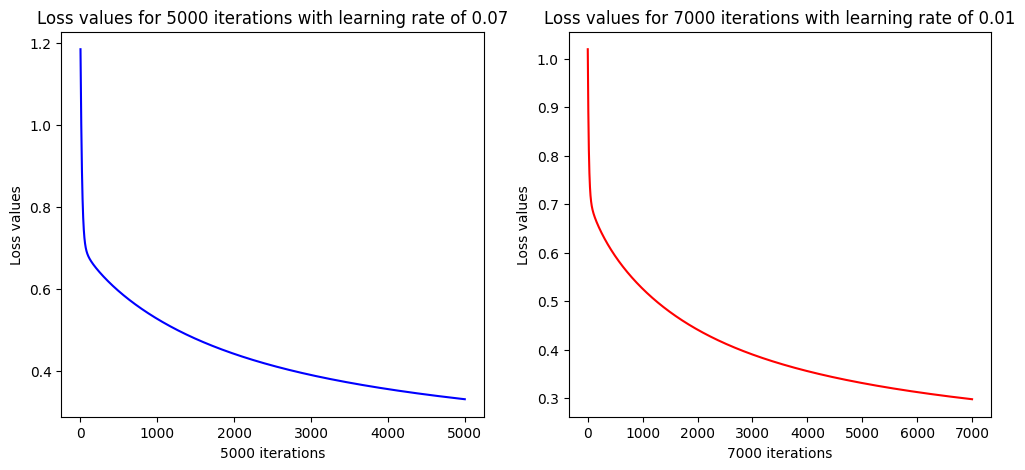

In [79]:
#Creating subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(range(num_iterations[2]), loss_value3, color='blue')

#Setting the title of the graph
ax[0].set_title('Loss values for 5000 iterations with learning rate of 0.07')

#Setting x label and y label
ax[0].set_xlabel('5000 iterations')
ax[0].set_ylabel('Loss values')

ax[1].plot(range(num_iterations[3]), loss_value4, color='red')
                
#Setting the title of the graph
ax[1].set_title('Loss values for 7000 iterations with learning rate of 0.01')

#Setting x label and y label
ax[1].set_xlabel('7000 iterations')
ax[1].set_ylabel('Loss values')

fig.show()

In [59]:
# Finding out the predictor vector values

y_pred = predict(x_test, final_weights)

In [60]:
# Finding the accuracy by comparing y_test and y_pred

count = 0
for i,j in zip(y_test, y_pred):
    if i == j:
        count += 1
print(count)

59


In [61]:
print("The accuracy of the model with learning rate 0.07 and 80000 iterations is ", (count/len(y_test))*100)

The accuracy of the model with learning rate 0.07 and 80000 iterations is  88.05970149253731


In [62]:
# Printing the weights values

for i in final_weights:
    print(i)

8.638707333453565
8.290100779426202
8.873873944159635
5.55636444920363
9.188039706692974
12.405486665581169
-11.067973406540277
-10.17111460007754
-0.2701675045854325
-19.63950108963453


In [63]:
# Pickled file which consists of the final best weights

# Importing pickle library
import pickle

# Opening the pickle file with 'write binary mode'

with open("Sahiti_Jyothi_assignment1_part1.pkl", "wb") as f:
    pickle.dump(final_weights, f)